In [1]:
import numpy as np
import os, requests, cv2, random
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [21]:

# Create an instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=360,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=360,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=360,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

training_dir = r'D:\DATASET\text_ocr\dataset\train'
validation_dir = r'D:\DATASET\text_ocr\dataset\validation'
testing_dir = r'D:\DATASET\text_ocr\dataset\test'

In [22]:
# Load the training dataset using the ImageDataGenerator
train_dataset = train_datagen.flow_from_directory(
    training_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
    seed=42
)


# Load the validation dataset using the ImageDataGenerator
validation_dataset = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(32, 32),  
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Load the validation dataset using the ImageDataGenerator
testing_dataset = valid_datagen.flow_from_directory(
    testing_dir,
    target_size=(32, 32),  
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 9800 images belonging to 10 classes.
Found 1400 images belonging to 10 classes.
Found 2800 images belonging to 10 classes.


In [5]:
# Print the number of classes in the dataset
num_classes = len(train_dataset.class_indices)
print("Number of classes:", num_classes)

Number of classes: 10


In [6]:
# Print the names of the classes
class_names = list(train_dataset.class_indices.keys())
print("Class names:", class_names)


Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [7]:
# Print the number of training and validation images
print("Number of training images:", train_dataset.n)
print("Number of validation images:", validation_dataset.n)
print("Number of testing images:", testing_dataset.n)

Number of training images: 9800
Number of validation images: 1400
Number of testing images: 2800


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Define the checkpoint callback to save the model with the minimum loss
checkpoint_callback = ModelCheckpoint('text.h5', 
                                      monitor='val_loss', 
                                      save_best_only=True)

In [12]:
# Define early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',    
    patience = 20,        
    verbose=1,            
    restore_best_weights=True  
)

In [13]:
# Train the model with the checkpoint callback
history = model.fit(train_dataset,
                    batch_size=40,
                    epochs=1000, 
                    validation_data=validation_dataset, 
                    callbacks=[checkpoint_callback, early_stopping_callback])


Epoch 1/1000
490/490 [==============================] - 15s 27ms/step - loss: 2.3108 - accuracy: 0.0971 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/1000
490/490 [==============================] - 13s 26ms/step - loss: 2.3078 - accuracy: 0.0977 - val_loss: 2.2996 - val_accuracy: 0.1586
Epoch 3/1000
490/490 [==============================] - 13s 27ms/step - loss: 2.2914 - accuracy: 0.1332 - val_loss: 2.2029 - val_accuracy: 0.1871
Epoch 4/1000
490/490 [==============================] - 14s 29ms/step - loss: 2.1564 - accuracy: 0.1819 - val_loss: 1.7910 - val_accuracy: 0.3850
Epoch 5/1000
490/490 [==============================] - 15s 31ms/step - loss: 1.8383 - accuracy: 0.2914 - val_loss: 1.4398 - val_accuracy: 0.4336
Epoch 6/1000
490/490 [==============================] - 17s 35ms/step - loss: 1.5118 - accuracy: 0.4167 - val_loss: 1.4162 - val_accuracy: 0.4257
Epoch 7/1000
490/490 [==============================] - 18s 36ms/step - loss: 1.1694 - accuracy: 0.5348 - val_loss: 1.2117 -

In [20]:
# Evaluate the model on the train dataset
loss, accuracy = model.evaluate(train_dataset)
print('Train Accuracy: {:.2f}%'.format(accuracy*100))
print('Train Loss: {:.2f}'.format(loss))

490/490 [==============================] - 11s 23ms/step - loss: 0.2367 - accuracy: 0.8779
Train Accuracy: 87.79%
Train Loss: 0.24


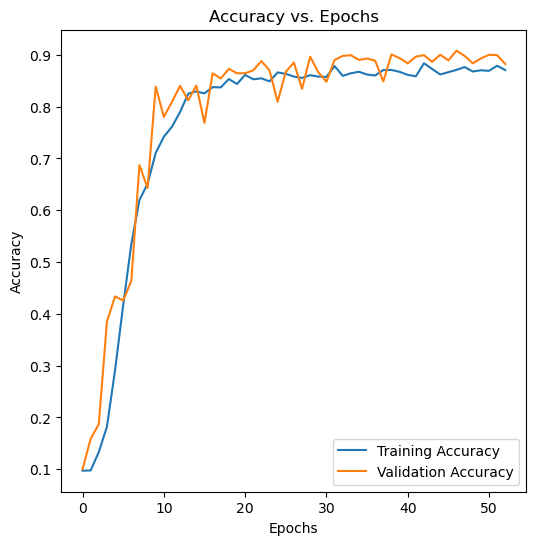

In [14]:
# Plot accuracy vs. epochs
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.savefig('text_ocr_model_accuracy_vs_epochs.png') 

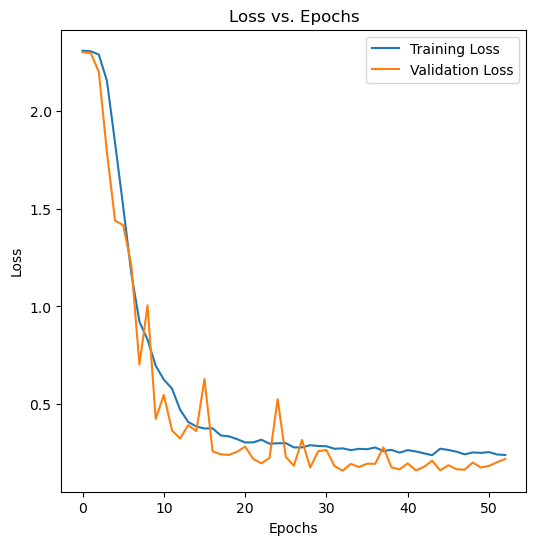

In [15]:
# Plot loss vs. epochs
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.savefig('text_ocr_model_loss_vs_epochs.png')  
plt.show()

In [23]:
# Load the saved model
model = tf.keras.models.load_model(r'text.h5')

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(testing_dataset)
print('Test Accuracy: {:.2f}%'.format(accuracy*100))
print('Test Loss: {:.2f}'.format(loss))

# Predict the classes for the test dataset
predictions = model.predict(testing_dataset)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true labels
true_classes = testing_dataset.classes

# Get class labels
class_labels = list(testing_dataset.class_indices.keys())

from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

140/140 [==============================] - 3s 18ms/step - loss: 0.1769 - accuracy: 0.8814
Test Accuracy: 88.14%
Test Loss: 0.18
140/140 [==============================] - 3s 18ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00       280
           2       1.00      1.00      1.00       280
           3       1.00      1.00      1.00       280
           4       1.00      1.00      1.00       280
           5       1.00      0.94      0.97       280
           6       0.46      0.91      0.62       280
           7       1.00      1.00      1.00       280
           8       1.00      1.00      1.00       280
           9       0.11      0.01      0.02       280

    accuracy                           0.89      2800
   macro avg       0.86      0.89      0.86      2800
weighted avg       0.86      0.89      0.86      2800

